# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about how the College Board might work to increase the participation rate in a state of your choice.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import re
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat2017_data = pd.read_csv('../data/sat_2017.csv')
act2017_data = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat2017_data.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017_data.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: For both set of tests, it can be observed that the average scores are generally higher in states that have lower participation, highlighting an inverse relationship between participation rates and score. 


#### 4a. Does the data look complete? 

Answer: No

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:
For ACT: Min - 1, Max - 36
For SAT: Min - 400, Max - 1600

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
# In SAT 2017, the Math score for Maryland is 52, which is lower than the minimum score of 400.
# This is likely due to copying error. The actual source has the correct value of 526.
sat2017_data.loc[sat2017_data['State']=='Maryland',['Math']] = 526

# Also, in ACT 2017 Science score for Maryland, the score in the csv is incorrect.
# Similar to above error, might be due to copying error during scraping. Actual source has correct value of 23.2
# Note that this error was found only after doing the boxplot and there was an extreme outlier, hence there was a validation of data done with actual source.
act2017_data.loc[act2017_data['State']=='Maryland',['Science']] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#code
sat2017_data.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act2017_data.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
For act2017 data, the composite column should be in float64 type instead of object, based on the first 10 rows that we have printed earlier. This hints of some data irregularities in the column "Composite" for this dataset.

For both sets, the participation should be set as float64 if we want to use it for further analysis later, which can be done by removing the percentage symbol from the data.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#code
def convert_participation_type(participation_col):
    return participation_col.map(lambda x: float(x.rstrip('%')))

- Fix any individual values preventing other columns from being the appropriate type.

In [9]:
#code
def fix_values(col):
    return col.map(lambda x: float(re.sub('[^\d\.]','',x)))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [10]:
#code
act2017_data['Participation'] = convert_participation_type(act2017_data['Participation'])
sat2017_data['Participation'] = convert_participation_type(sat2017_data['Participation'])
act2017_data['Composite'] = fix_values(act2017_data['Composite'])

- Display the data types again to confirm they are correct.

In [11]:
#Code:
sat2017_data.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [12]:
act2017_data.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [13]:
#code
# Following is to lowercase the columns 
act2017_data.columns = act2017_data.columns.str.lower() 
sat2017_data.columns = sat2017_data.columns.str.lower()


act2017_data = act2017_data.rename(columns = {"participation": "participation_act_2017",
                                              "english": "english_act_2017",
                                              "math": "math_act_2017",
                                              "reading":"reading_act_2017",
                                              "science":"science_act_2017",
                                              "composite": "composite_act_2017"                                             
                                             })
sat2017_data = sat2017_data.rename(columns = {"participation": "participation_sat_2017",
                                              "evidence-based reading and writing" : "reading_sat_2017",
                                              "math":"math_sat_2017",
                                              "total": "total_sat_2017"
                                             })

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 
|state|object|ACT/SAT|Name of state|
|participation_act_2017|float|ACT|Percentage of students of the state taking ACT in 2017 (units in percent to one decimal place)|
|participation_sat_2017|float|SAT|Percentage of students of the state taking SAT in 2017 (units in percent to one decimal place)|
|english_act_2017|float|ACT|Average ACT score of English of the state in 2017 (units to 1 decimal place)|
|math_act_2017|float|ACT|Average ACT score of Math of the state in 2017 (units to 1 decimal place)|
|reading_act_2017|float|ACT|Average ACT score of Reading of the state in 2017 (units to 1 decimal place)|
|science_act_2017|float|ACT|Average ACT score of Science of the state in 2017 (units to 1 decimal place)|
|composite_act_2017|float|ACT|Averaged combined average score of all ACT subjects of the state in 2017 (units to 1 decimal place)|
|evidence-based_reading_and_writing_sat_2017|int|SAT|Average SAT score of Evidenced-Based Reading and Writing of the state in 2017|
|math_sat_2017|int|SAT|Average SAT score of Math of the state in 2017|
|total_sat_2017|int|SAT|Average combined SAT score of all subjects of the state in 2017|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [14]:
#code
act2017_data = act2017_data[act2017_data['state'] != 'National']

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [15]:
#Code:
combined_2017_data = pd.merge(sat2017_data,act2017_data,on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [16]:
#code
combined_2017_data.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [17]:
#Import data for 2018 ACT and SAT
sat2018_data = pd.read_csv('../data/sat_2018.csv')
act2018_data = pd.read_csv('../data/act_2018.csv')

In [18]:
#Display data for the 2018 dataset to get a sense of how the data looks like
sat2018_data.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,56%,550,549,1099


In [19]:
act2018_data.head(10)

,State,Participation,Composite,English,Math,Reading,Science
0,Alabama,100%,19.1,18.9,18.3,19.6,19.0
1,Alaska,33%,20.8,19.8,20.6,21.6,20.7
2,Arizona,66%,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100%,19.4,19.1,18.9,19.7,19.4
4,California,27%,22.7,22.5,22.5,23.0,22.1
5,Colorado,30%,23.9,23.9,23.2,24.4,23.5
6,Connecticut,26%,25.6,26.0,24.8,26.1,24.9
7,Delaware,17%,23.8,23.7,23.1,24.5,23.4
8,District of columbia,32%,23.6,23.7,22.7,24.4,23.0
9,Florida,66%,19.9,19.2,19.3,21.1,19.5


In [20]:
# Get the data types of the 2 datatables
act2018_data.dtypes

State             object
Participation     object
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [21]:
sat2018_data.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [22]:
#Make data modifications to ensure the data are displayed in the correct type
act2018_data['Participation'] = convert_participation_type(act2018_data['Participation'])
sat2018_data['Participation'] = convert_participation_type(sat2018_data['Participation'])

In [23]:
#Check data types again to ensure both datatables have the correct columns format
act2018_data.dtypes

State             object
Participation    float64
Composite        float64
English          float64
Math             float64
Reading          float64
Science          float64
dtype: object

In [24]:
sat2018_data.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [25]:
# 1. Lowercase the columns

act2018_data.columns = act2018_data.columns.str.lower()
sat2018_data.columns = sat2018_data.columns.str.lower()

# 2. Rename the columns for the datatables

act2018_data = act2018_data.rename(columns = {"participation": "participation_act_2018",
                                              "english": "english_act_2018",
                                              "math": "math_act_2018",
                                              "reading":"reading_act_2018",
                                              "science":"science_act_2018",
                                              "composite": "composite_act_2018"                                             
                                             })
sat2018_data = sat2018_data.rename(columns = {"participation": "participation_sat_2018",
                                              "evidence-based reading and writing" : "reading_sat_2018",
                                              "math":"math_sat_2018",
                                              "total": "total_sat_2018"
                                             })

In [26]:
#Merge both datatables
combined_2018_data = pd.merge(sat2018_data,act2018_data,on='state')

In [27]:
#Save the merged dataframe as 'combined_2018.csv' using a relative path
combined_2018_data.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [28]:
combined_data = pd.merge(combined_2017_data,combined_2018_data,on='state')
combined_data.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [29]:
#Code:
combined_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
participation_sat_2017,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
reading_sat_2017,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
math_sat_2017,50.0,558.700,45.809833,492.0,524.000,549.50,601.000,651.0
total_sat_2017,50.0,1129.620,89.913085,996.0,1057.000,1107.50,1214.000,1295.0
participation_act_2017,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
english_act_2017,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
math_act_2017,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
reading_act_2017,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
science_act_2017,50.0,21.410,1.731962,18.2,19.925,21.30,22.975,24.9
composite_act_2017,50.0,21.466,2.004241,17.8,19.800,21.40,23.400,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [30]:
#code
def std_dev(x):
    mean_val = sum(x)/x.count()
    return np.sqrt((sum([(i-mean_val) ** 2 for i in x ])/x.count()))

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [31]:
#Code:

sd = {i:std_dev(combined_data[i]) for i in combined_data.columns if i != 'state'}
# np.std(combined_data['science_act_2018'])
print(sd)

{'participation_sat_2017': 34.21286307808804, 'reading_sat_2017': 43.9390532442382, 'math_sat_2017': 45.34942116499394, 'total_sat_2017': 89.00941298536914, 'participation_act_2017': 31.787947401491657, 'english_act_2017': 2.3009467616613812, 'math_act_2017': 1.9541504548012678, 'reading_act_2017': 2.025750231395766, 'science_act_2017': 1.7145553359399048, 'composite_act_2017': 1.9840977798485642, 'participation_sat_2018': 36.72475459414263, 'reading_sat_2018': 46.537937212558106, 'math_sat_2018': 46.51518461749884, 'total_sat_2018': 91.91248881408882, 'participation_act_2018': 33.7712540483767, 'composite_act_2018': 2.090091864009809, 'english_act_2018': 2.4155007762366796, 'math_act_2018': 2.0233052167184264, 'reading_act_2018': 2.1403214711813736, 'science_act_2018': 1.8551161688692166}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
The manually calculated standard deviations match with numpy's `std` method but not the standard deviations from pandas `describe`.
This is because by default, pandas `describe` assume sample standard deviation as compared to numpy's `std`, which assume population standard variation.

To put in perspective, numpy's `std` function has a default degree of freedom(ddof) of 0 whereas the `describe` method in pandas has a default ddof of 1.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [32]:
#Define functions to sort/filter columns, only displaying the data required.
def sort_column(df,column,ascend=True):
    return df.sort_values(column,ascending=ascend)

def get_required_columns(df,column_list): # This function is used to extract only the sorted column in question with the key value.
    return df[column_list]

def filtered_df(df,column,value):
    return df[df[column]==value]

def get_sorted_column(column,ascend=True,df=combined_data):
    sorted_df = sort_column(df,column,ascend)
    return get_required_columns(sorted_df,['state',column]) #State being the key value, so it will be required to be displayed 

def get_filtered_column(column,value,df=combined_data):
    get_required_column_df = get_required_columns(df,['state',column]) #State being the key value, so it will be required to be displayed
    return filtered_df(get_required_column_df,column,value)

In [33]:
#This is an example of getting a subset of dataframe by sort. For the rest of the code, I will be extracting them by boolean filtering.
get_sorted_column('participation_sat_2017',False).head(10)

,state,participation_sat_2017
21,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
28,New Hampshire,96.0
18,Maine,95.0
11,Idaho,93.0
8,Florida,83.0
20,Massachusetts,76.0
38,Rhode Island,71.0
29,New Jersey,70.0


In [34]:
get_filtered_column('participation_sat_2018',max(combined_data['participation_sat_2018']))

,state,participation_sat_2018
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
11,Idaho,100.0
21,Michigan,100.0


In [35]:
get_filtered_column('participation_act_2017',max(combined_data['participation_act_2017']))

,state,participation_act_2017
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
16,Kentucky,100.0
17,Louisiana,100.0
22,Minnesota,100.0
23,Mississippi,100.0
24,Missouri,100.0
25,Montana,100.0
27,Nevada,100.0


In [36]:
get_filtered_column('participation_act_2018',max(combined_data['participation_sat_2018']))

,state,participation_act_2018
0,Alabama,100.0
3,Arkansas,100.0
16,Kentucky,100.0
17,Louisiana,100.0
23,Mississippi,100.0
24,Missouri,100.0
25,Montana,100.0
26,Nebraska,100.0
27,Nevada,100.0
32,North Carolina,100.0


In [37]:
get_filtered_column('participation_sat_2017',min(combined_data['participation_sat_2017']))

,state,participation_sat_2017
14,Iowa,2.0
23,Mississippi,2.0
33,North Dakota,2.0


In [38]:
get_filtered_column('participation_sat_2018',min(combined_data['participation_sat_2018']))

,state,participation_sat_2018
33,North Dakota,2.0


In [39]:
get_filtered_column('participation_act_2017',min(combined_data['participation_act_2017']))

,state,participation_act_2017
18,Maine,8.0


In [40]:
get_filtered_column('participation_act_2018',min(combined_data['participation_act_2018']))

,state,participation_act_2018
18,Maine,7.0


In [41]:
get_filtered_column('total_sat_2017',max(combined_data['total_sat_2017']))

,state,total_sat_2017
22,Minnesota,1295


In [42]:
get_filtered_column('total_sat_2017',min(combined_data['total_sat_2017']))

,state,total_sat_2017
7,Delaware,996


In [43]:
get_filtered_column('total_sat_2018',max(combined_data['total_sat_2018']))

,state,total_sat_2018
22,Minnesota,1298


In [44]:
get_filtered_column('total_sat_2018',min(combined_data['total_sat_2018']))

,state,total_sat_2018
7,Delaware,998


In [45]:
get_filtered_column('composite_act_2017',max(combined_data['composite_act_2017']))

,state,composite_act_2017
28,New Hampshire,25.5


In [46]:
get_filtered_column('composite_act_2017',min(combined_data['composite_act_2017']))

,state,composite_act_2017
27,Nevada,17.8


In [47]:
get_filtered_column('composite_act_2018',max(combined_data['composite_act_2018']))

,state,composite_act_2018
6,Connecticut,25.6


In [48]:
get_filtered_column('composite_act_2018',min(combined_data['composite_act_2018']))

,state,composite_act_2018
27,Nevada,17.7


In [49]:
combined_data[(combined_data['participation_sat_2017']==100) | (combined_data['participation_sat_2018']==100)][['state','participation_sat_2017','participation_sat_2018']]

,state,participation_sat_2017,participation_sat_2018
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
11,Idaho,93.0,100.0
21,Michigan,100.0,100.0


In [50]:
combined_data[(combined_data['participation_act_2017']==100) | (combined_data['participation_act_2018']==100)][['state','participation_act_2017','participation_act_2018']]

,state,participation_act_2017,participation_act_2018
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
5,Colorado,100.0,30.0
16,Kentucky,100.0,100.0
17,Louisiana,100.0,100.0
22,Minnesota,100.0,99.0
23,Mississippi,100.0,100.0
24,Missouri,100.0,100.0
25,Montana,100.0,100.0
26,Nebraska,84.0,100.0


In [51]:
combined_data[(combined_data['participation_sat_2017'] > 50) & (combined_data['participation_act_2017'] > 50)][['state','participation_sat_2017','participation_act_2017']]

,state,participation_sat_2017,participation_act_2017
8,Florida,83.0,73.0
9,Georgia,61.0,55.0
10,Hawaii,55.0,90.0


In [52]:
combined_data[(combined_data['participation_sat_2018'] > 50) & (combined_data['participation_act_2018'] > 50)][['state','participation_sat_2018','participation_act_2018']]

,state,participation_sat_2018,participation_act_2018
8,Florida,56.0,66.0
9,Georgia,70.0,53.0
10,Hawaii,56.0,89.0
32,North Carolina,52.0,100.0
39,South Carolina,55.0,100.0


- Which states have the highest and lowest participation rates for the:

2017 SAT? Highest: Michigan, Connecticut, Delaware / Lowest: Iowa, Mississippi, North Dakota

2018 SAT? Highest: Colorado, Connecticut, Delaware, Michigan, Idaho / Lowest: North Dakota

2017 ACT? Highest: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North 
Carolina, Nevada, Missouri, Mississippi, Minnesota, Louisiana, Montana, Wyoming, Arkansas, Colorado / Lowest: Maine

2018 ACT? Highest: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Missouri, Mississippi, Louisiana, Montana, Wyoming, Arkansas / Lowest: Maine

- Which states have the highest and lowest mean total/composite scores for the:

2017 SAT? Highest: Minnesota / Lowest: Delaware

2018 SAT? Highest: Minnesota / Lowest: Delaware

2017 ACT? Highest: New Hampshire / Lowest: Nevada

2018 ACT? Highest: Connecticut / Lowest: Nevada

- Do any states with 100% participation on a given test have a rate change year-to-year?

SAT: Colorado (from 11% to 100%) and Idaho (93% to 100%)

ACT: Nebraska (from 84% to 100%) and Ohio (from 75% to 100%)

- Do any states show have >50% participation on both tests either year?

States with >50% participation for both tests:

2017: Florida, Georgia, Hawaii

2018: Florida, Georgia, Hawaii, North and South Carolina

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation between Exam Scores & Participation Rate')

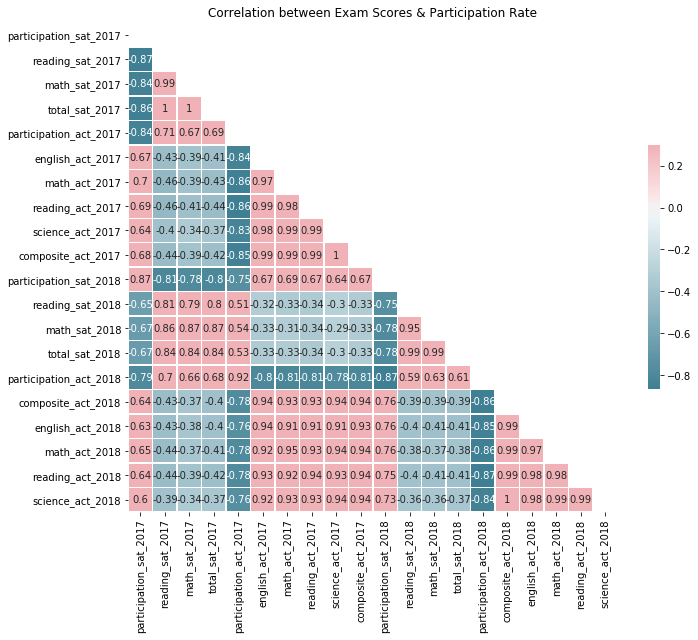

In [53]:
# Get the correleation

corr = combined_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title('Correlation between Exam Scores & Participation Rate')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [54]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('No. of states') # y-label is hardcoded in this case since the y-label is always number of states having the specific score/participation rate
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

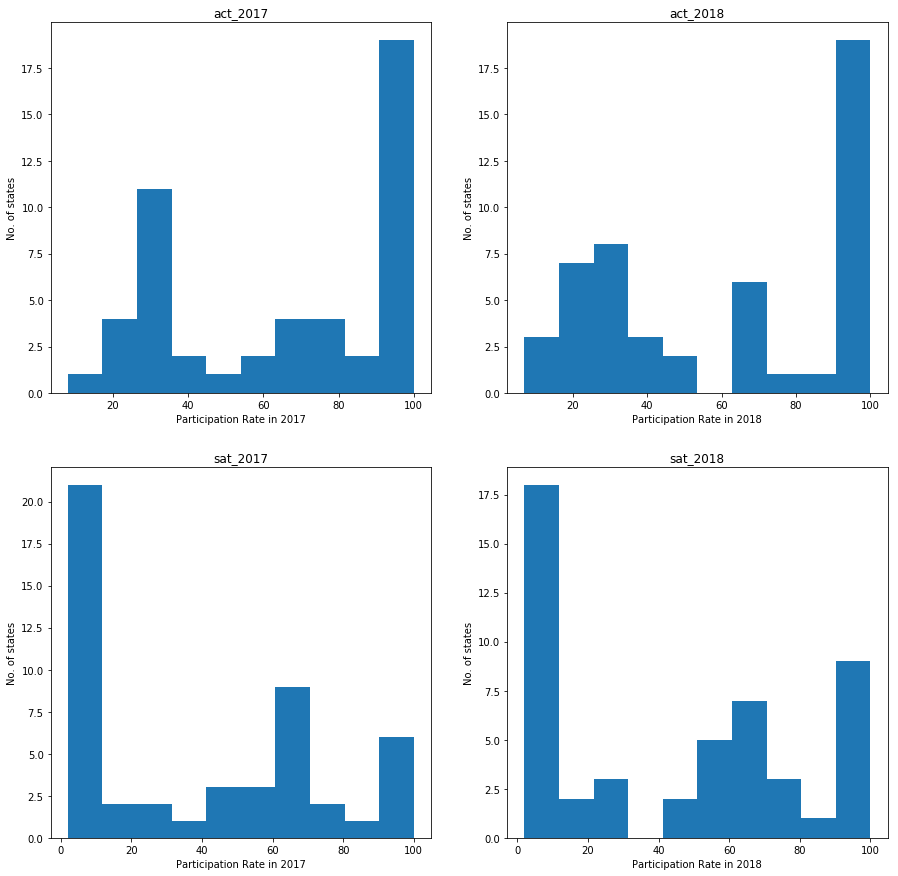

In [55]:
# Code
subplot_histograms(combined_data,
                   ['participation_act_2017','participation_act_2018','participation_sat_2017','participation_sat_2018'],
                   ['act_2017','act_2018','sat_2017','sat_2018'],
                   ['Participation Rate in 2017','Participation Rate in 2018','Participation Rate in 2017','Participation Rate in 2018'])

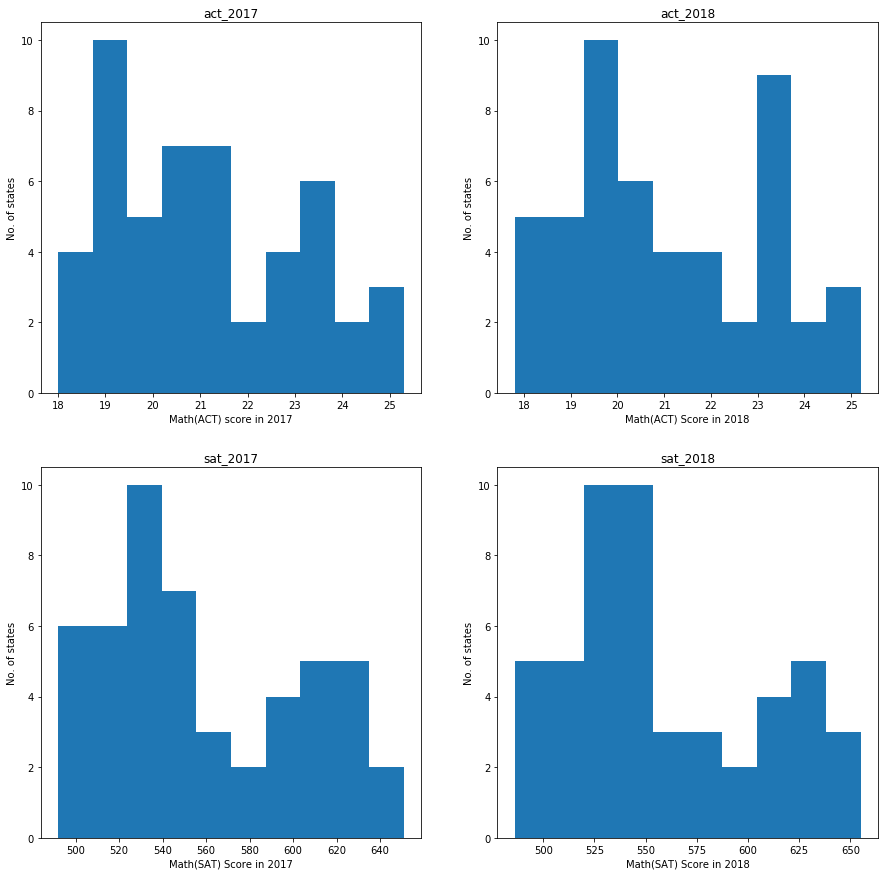

In [56]:
# Code
subplot_histograms(combined_data,
                   ['math_act_2017','math_act_2018','math_sat_2017','math_sat_2018'],
                   ['act_2017','act_2018','sat_2017','sat_2018'],
                   ['Math(ACT) score in 2017','Math(ACT) Score in 2018','Math(SAT) Score in 2017','Math(SAT) Score in 2018'])

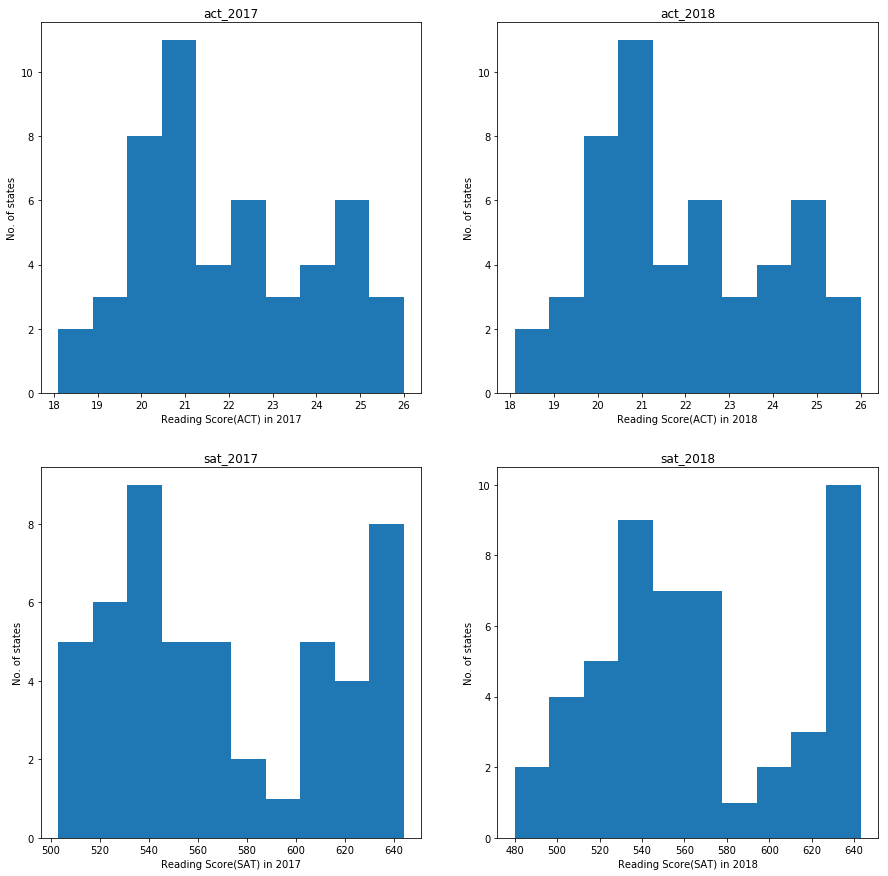

In [57]:
# Code
subplot_histograms(combined_data,
                   ['reading_act_2017','reading_act_2017','reading_sat_2017','reading_sat_2018'],
                   ['act_2017','act_2018','sat_2017','sat_2018'],
                   ['Reading Score(ACT) in 2017','Reading Score(ACT) in 2018','Reading Score(SAT) in 2017','Reading Score(SAT) in 2018'])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [58]:
# Code
def subplot_scatterplots(dataframe, list_of_columns, title, x_label,y_label):
    plt.figure(figsize=(10, 5))
    plt.scatter(dataframe[list_of_columns[0]],dataframe[list_of_columns[1]],c='green')
    plt.plot(np.unique(dataframe[list_of_columns[0]]), np.poly1d(np.polyfit(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]], 1))(np.unique(dataframe[list_of_columns[0]])),c='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


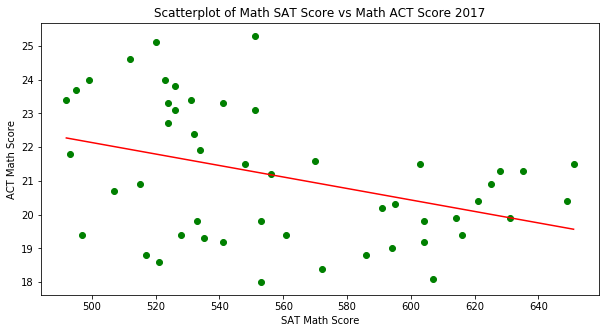

In [59]:
subplot_scatterplots(combined_data,['math_sat_2017','math_act_2017'],
                     'Scatterplot of Math SAT Score vs Math ACT Score 2017','SAT Math Score','ACT Math Score')

Looking at the scatterplot between Math SAT and ACT scores, they are negatively correlated.

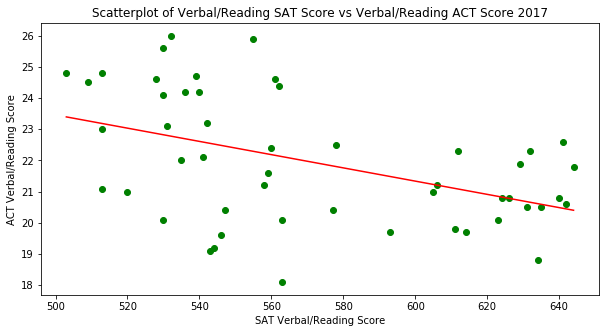

In [60]:
subplot_scatterplots(combined_data,['reading_sat_2017','reading_act_2017'],
                     'Scatterplot of Verbal/Reading SAT Score vs Verbal/Reading ACT Score 2017',
                     'SAT Verbal/Reading Score','ACT Verbal/Reading Score')

The verbal/reading score of SAT vs ACT score are also negatively correlated as well.

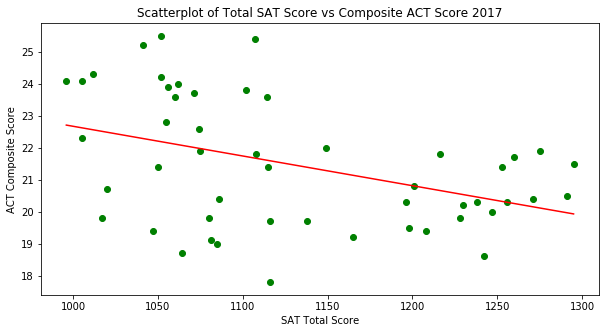

In [61]:
subplot_scatterplots(combined_data,['total_sat_2017','composite_act_2017'],
                     'Scatterplot of Total SAT Score vs Composite ACT Score 2017',
                     'SAT Total Score','ACT Composite Score')

The negative correlation applies to the total SAT score vs Composite ACT score too.

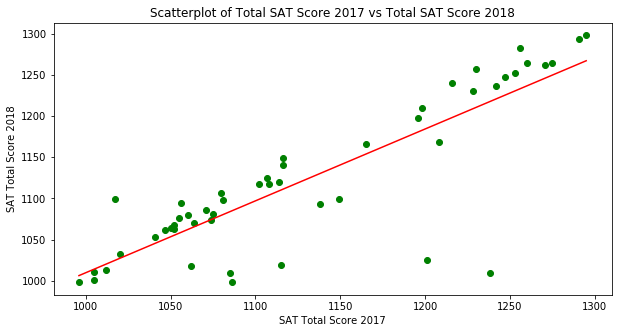

In [62]:
subplot_scatterplots(combined_data,['total_sat_2017','total_sat_2018'],
                     'Scatterplot of Total SAT Score 2017 vs Total SAT Score 2018',
                     'SAT Total Score 2017','SAT Total Score 2018')

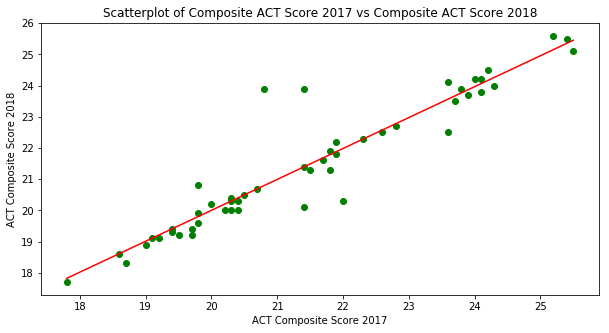

In [63]:
subplot_scatterplots(combined_data,['composite_act_2017','composite_act_2018'],
                     'Scatterplot of Composite ACT Score 2017 vs Composite ACT Score 2018',
                     'ACT Composite Score 2017','ACT Composite Score 2018')

Two positive correlations were found.<br>
The scores for Total SAT score between 2017 and 2018, and the composite ACT scores between 2017 and 2018.<br>
Furthermore, they are highly correlated as well as the points lie closely to the normal line.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

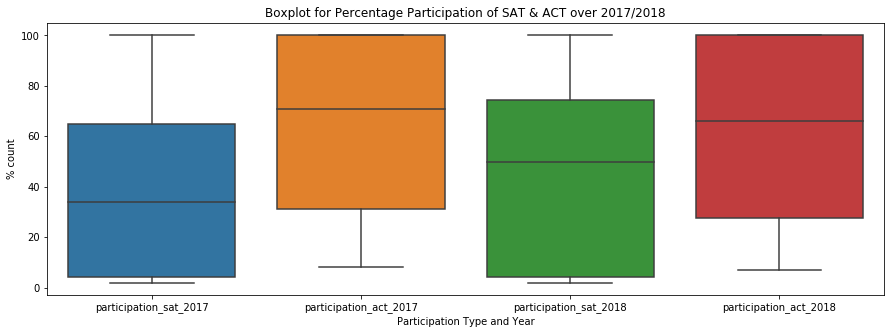

In [64]:
# Code
def plot_boxplot(df,column_filter,title,x_label,y_label):
    filtered_column_list = [column for column in df.columns if column_filter in column]
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='variable',y='value',data=pd.melt(df[filtered_column_list]))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

plot_boxplot(combined_data,'participation','Boxplot for Percentage Participation of SAT & ACT over 2017/2018','Participation Type and Year','% count')

From the above boxplot, we can clearly see that there's a higher participation rate for ACT as compared to SAT from the respective states, which is observed from the range of the IQR. <br>


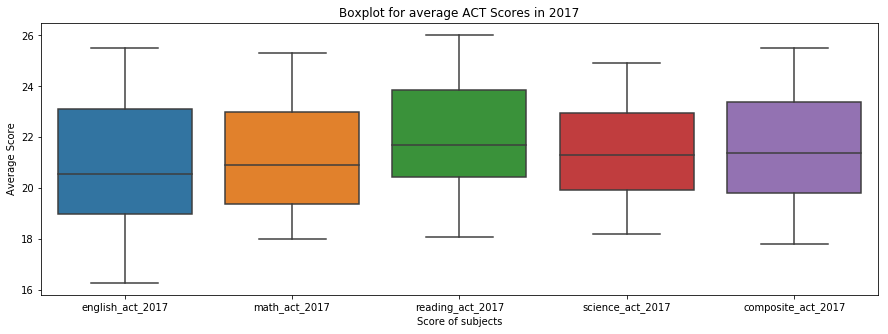

In [65]:
combined_data_without_part = combined_data.drop(columns=['participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018'])
combined_data_without_part.columns
plot_boxplot(combined_data_without_part,'act_2017','Boxplot for average ACT Scores in 2017','Score of subjects','Average Score')

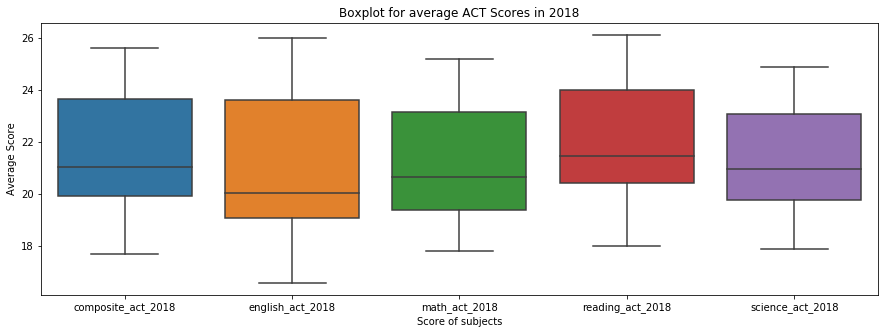

In [66]:
plot_boxplot(combined_data_without_part,'act_2018','Boxplot for average ACT Scores in 2018','Score of subjects','Average Score')

Looking at the above 2 boxplots that shows the average score for ACT, those that participated in ACT tend to perform better in Reading tests as compared to the other subjects.

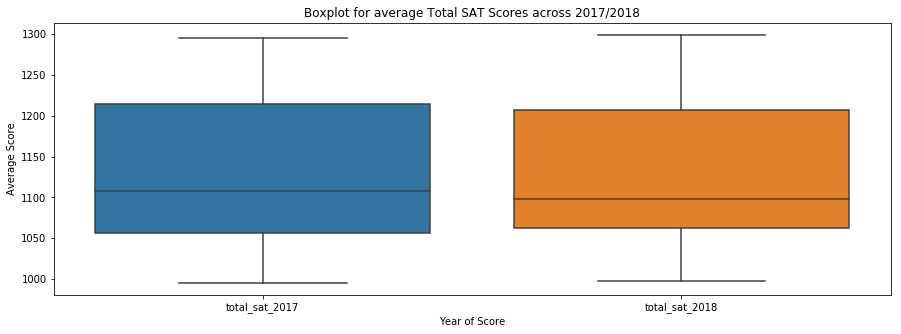

In [67]:
plot_boxplot(combined_data_without_part,'total_sat','Boxplot for average Total SAT Scores across 2017/2018','Year of Score','Average Score')

SAT scores remain fairly consistent over the 2 years, but majority of the states have a slight dip in scores from 2017.

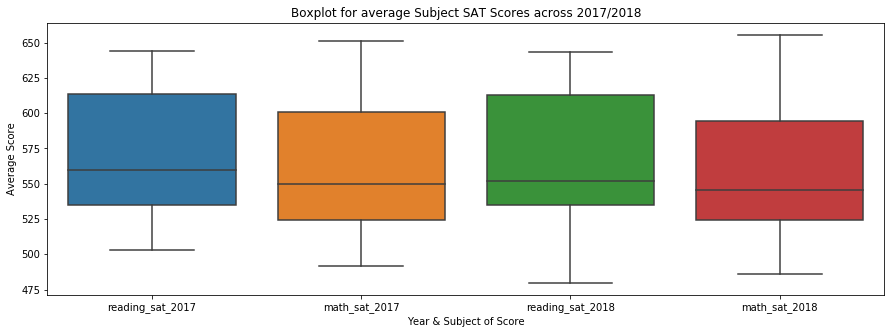

In [68]:
combined_data_without_total = combined_data_without_part.drop(columns=['total_sat_2017','total_sat_2018'])
plot_boxplot(combined_data_without_total,'sat_','Boxplot for average Subject SAT Scores across 2017/2018','Year & Subject of Score','Average Score')

A common theme across both ACT and SAT is that, majority of the participants for both SAT and ACT tend to fare better in reading as compared to the rest of the subjects, which is clearly evident from the box size and the 25 percentile scores.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, because the scope of the math tests are different across both tests.
The Math ACT tests cover trigonometry whereas SAT does not. 

(Reference: http://www.math.com/students/kaplan/satoract.html) 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [69]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Three states with interesting trends in SAT/ACT partcipation rates:

1. Colorado <br>
Massive increase in SAT participation rate from 11% to 100% from 2017 to 2018. <br>
Reason: Because of "Legislative Testing Compromise", the Colorado Department of Education announced a shift from the ACT to the SAT as the official form of college prep exam, with the last batch of ACT done in 2016 (results announced in 2017).
Link: https://www.coloradoindependent.com/2017/07/06/from-csap-to-parcc-heres-how-colorados-standardized-tests-have-changed-and-whats-next/


2. Rhode Island <br>
Not a requirement in that state, yet showing high percentage of participation because it was offered in schools.


3. Idaho <br>
Large percentage took SAT instead of ACT because costs of taking SAT are covered by the state. <br>
Link: https://www.idahoednews.org/news/new-graduation-requirements-stir-debate-value-test-scores/


Link for tests required per state: https://www.edweek.org/ew/section/multimedia/what-tests-did-each-state-require-2016-17.html

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?